# CodesOnBytes
## Data Science Internship
### Phase 1

#### Task 1:
Call this public Api and create a csv dataset using python and pandas
Api: - https://data.binance.com/api/v3/ticker/24hr

In [1]:
# Importing required libraries
import pandas as pd
import requests

# Calling the API
api_url = "https://api.binance.com/api/v3/ticker/24hr"
data = requests.get(api_url)

# Checking if data was acquired successfully
if data.status_code == 200:
    print("Data acquired from URL of the API:\n{0}\n".format(data))

    # Getting JSON data from acquired data
    data_json = data.json()
    print("Data in JSON format:\n{0}\n".format(data_json))

    # Creating a Data Frame from the JSON data
    df = pd.DataFrame(data_json)
    print("Data Frame:\n{0}\n".format(df))

    # Saving the data frame to a CSV file
    csv_file_name = "binance_ticker_24hr.csv"
    df.to_csv(csv_file_name)
    print("Data saved to file: {0}".format(csv_file_name))
else:
    print("Failed to acquire data!\n")

Data acquired from URL of the API:
<Response [200]>

Data in JSON format:
[{'symbol': 'ETHBTC', 'priceChange': '0.00093000', 'priceChangePercent': '1.626', 'weightedAvgPrice': '0.05743930', 'prevClosePrice': '0.05720000', 'lastPrice': '0.05813000', 'lastQty': '0.01720000', 'bidPrice': '0.05812000', 'bidQty': '11.98770000', 'askPrice': '0.05813000', 'askQty': '22.94180000', 'openPrice': '0.05720000', 'highPrice': '0.05815000', 'lowPrice': '0.05676000', 'volume': '18295.77290000', 'quoteVolume': '1050.89630919', 'openTime': 1696952423645, 'closeTime': 1697038823645, 'firstId': 423763103, 'lastId': 423791293, 'count': 28191}, {'symbol': 'LTCBTC', 'priceChange': '-0.00001000', 'priceChangePercent': '-0.435', 'weightedAvgPrice': '0.00230688', 'prevClosePrice': '0.00230100', 'lastPrice': '0.00229000', 'lastQty': '4.71100000', 'bidPrice': '0.00229000', 'bidQty': '17.30100000', 'askPrice': '0.00229200', 'askQty': '260.15300000', 'openPrice': '0.00230000', 'highPrice': '0.00232600', 'lowPrice':

#### Task 2: Clean the dataset replace missing values, remove outliers etc.

Dataset: https://docs.google.com/spreadsheets/d/e/2PACX-1vTSSTcErkXNk8KB0AlijhitwetxeHD2M3R0HJl2QPMAyFq0fxFX4PFKnzA
WLDnratIz67DNL6GsZnV/pub?output=csv


In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

# Creating a Data Frame from the CSV file
df = pd.read_csv("dataset - netflix1.csv")
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [3]:
# Getting column-wise information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [4]:
# Checking for any null values
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [5]:
# Checking if any duplicate records are present
df.duplicated().value_counts()

False    8790
Name: count, dtype: int64

In [6]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


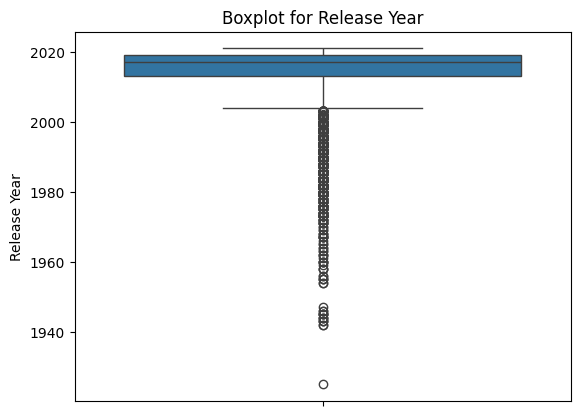

In [7]:
sns.boxplot(df["release_year"])
plt.ylabel("Release Year")
plt.title("Boxplot for Release Year")
plt.show()
# Outliers are present in release_year attribute

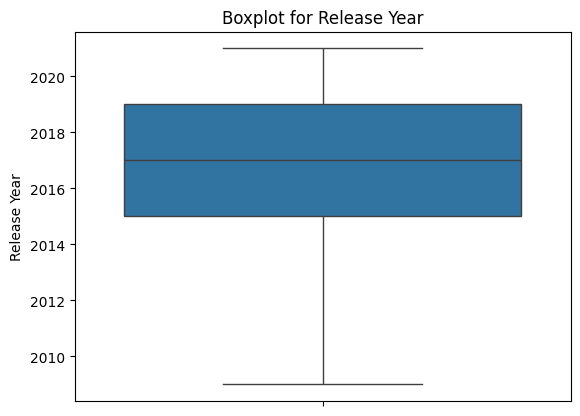

In [8]:
# Removing the outliers
df = df[df["release_year"] > 2008]
df.reset_index(inplace=True)
# df.drop(df.loc[df['release_year']>2008].index, inplace=True)

# Displaying the boxplot
sns.boxplot(df["release_year"])
plt.ylabel("Release Year")
plt.title("Boxplot for Release Year")
plt.show()

In [9]:
df

,index,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,9/24/2021,2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
...,...,...,...,...,...,...,...,...,...,...,...
7605,8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
7606,8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
7607,8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
7608,8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [10]:
list(df["duration"].value_counts().keys())

['1 Season',
 '2 Seasons',
 '3 Seasons',
 '90 min',
 '91 min',
 '97 min',
 '93 min',
 '92 min',
 '94 min',
 '95 min',
 '96 min',
 '102 min',
 '98 min',
 '99 min',
 '103 min',
 '100 min',
 '88 min',
 '86 min',
 '106 min',
 '87 min',
 '101 min',
 '107 min',
 '89 min',
 '105 min',
 '4 Seasons',
 '110 min',
 '104 min',
 '108 min',
 '83 min',
 '84 min',
 '111 min',
 '112 min',
 '113 min',
 '85 min',
 '5 Seasons',
 '109 min',
 '116 min',
 '115 min',
 '81 min',
 '118 min',
 '119 min',
 '117 min',
 '120 min',
 '114 min',
 '121 min',
 '82 min',
 '78 min',
 '80 min',
 '124 min',
 '127 min',
 '123 min',
 '126 min',
 '122 min',
 '133 min',
 '128 min',
 '135 min',
 '132 min',
 '125 min',
 '130 min',
 '72 min',
 '63 min',
 '74 min',
 '75 min',
 '73 min',
 '76 min',
 '6 Seasons',
 '61 min',
 '60 min',
 '79 min',
 '66 min',
 '77 min',
 '131 min',
 '71 min',
 '70 min',
 '65 min',
 '68 min',
 '53 min',
 '54 min',
 '69 min',
 '59 min',
 '64 min',
 '62 min',
 '137 min',
 '140 min',
 '24 min',
 '46 min',
 

In [11]:
# Adding columns to denote if a content is a web-series with seasons or a movie with duration in minutes
df["duration_season"] = 0
df["duration_movie"] = 0

In [12]:
# Removing string values in the duration column
for i in range(len(df)):
    value = df["duration"][i]
    if ("Seasons" in value):
        df["duration"][i] = df["duration"][i].replace("Seasons", "")
        df["duration_season"][i] = 1
    elif ("Season" in value):
        df["duration"][i] = df["duration"][i].replace("Season", "")
        df["duration_season"][i] = 1
    elif "min" in value:
        df["duration"][i] = df["duration"][i].replace("min", "")
        df["duration_movie"][i] = 1
    else:
        print("Its something new kind of content")
    

In [13]:
# Transforming the duration column to int datatype
df["duration"] = df["duration"].astype(int)

In [14]:
df.to_csv("dataset_netflix_cleaned.csv")